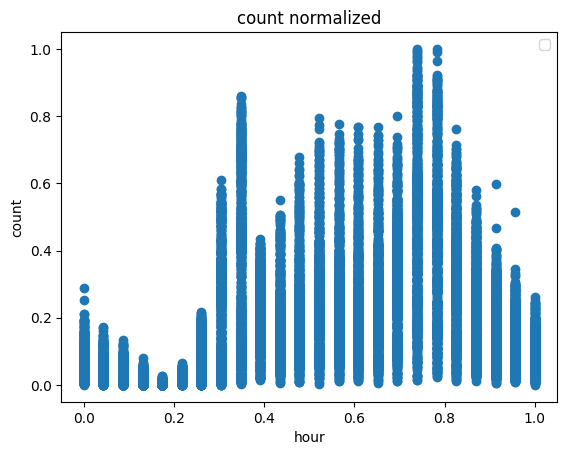

Spline regression may have better performance than polynomial regression because the curve has trend reverals


MSE :  0.020087653313571898


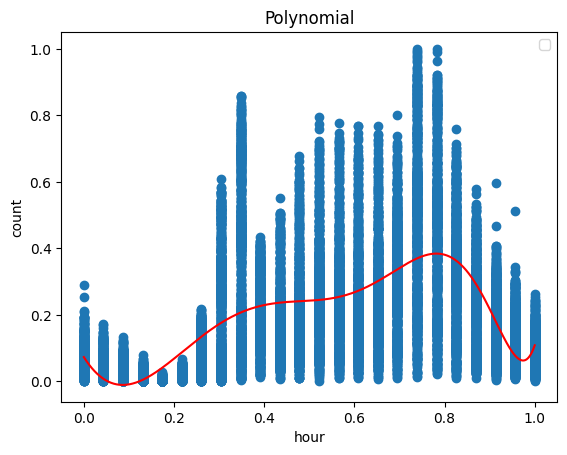

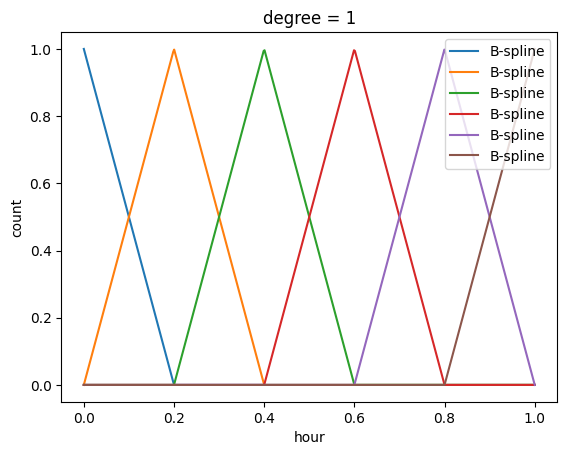

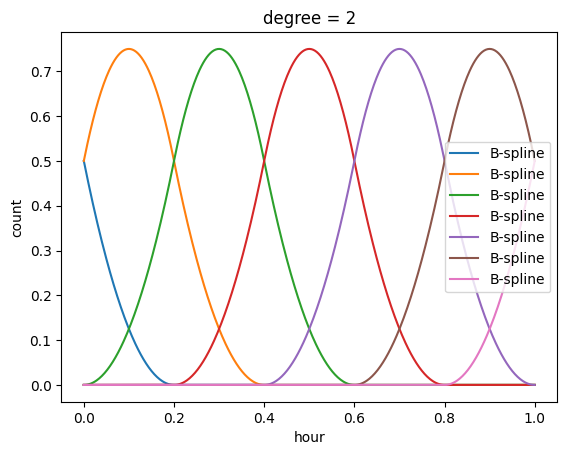

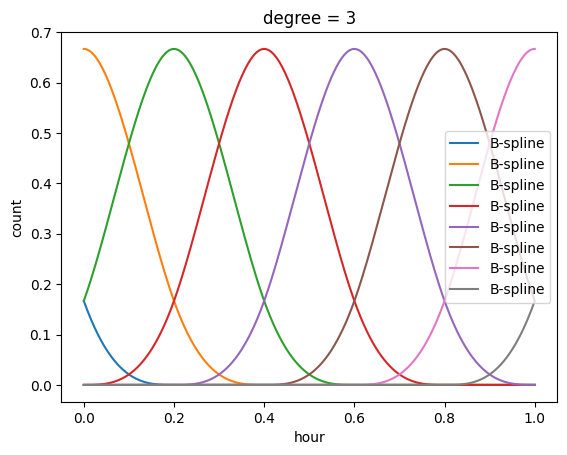

By increasing the degree of splines, smoothness of the curves increases


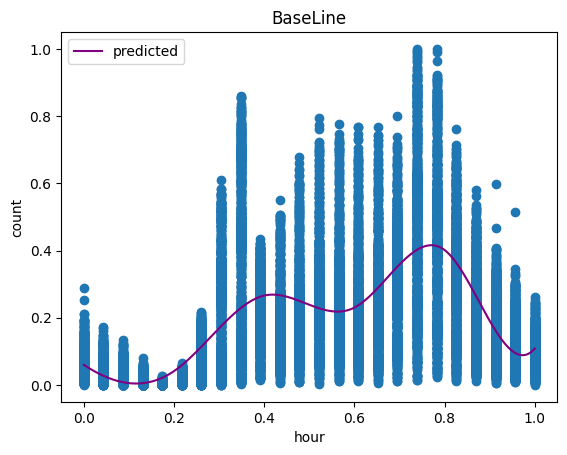

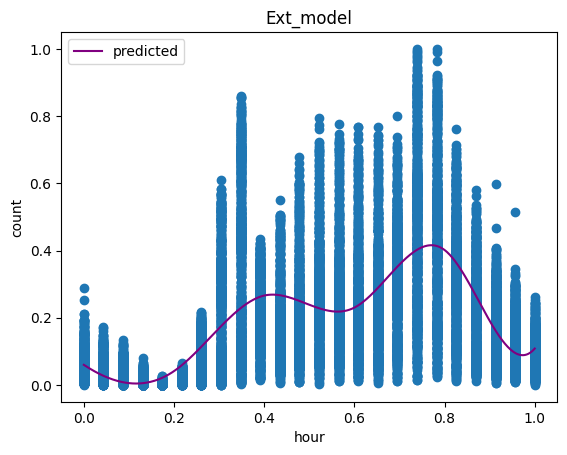

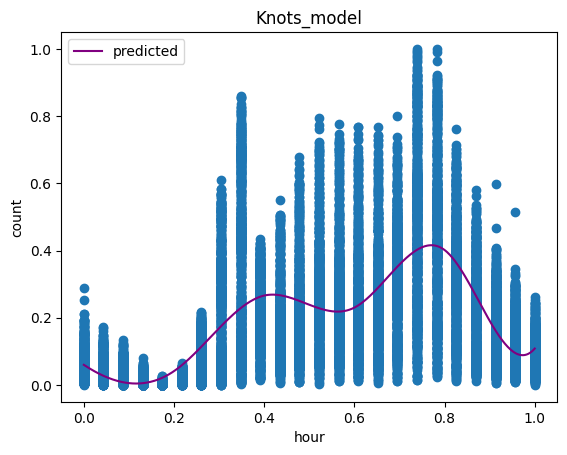

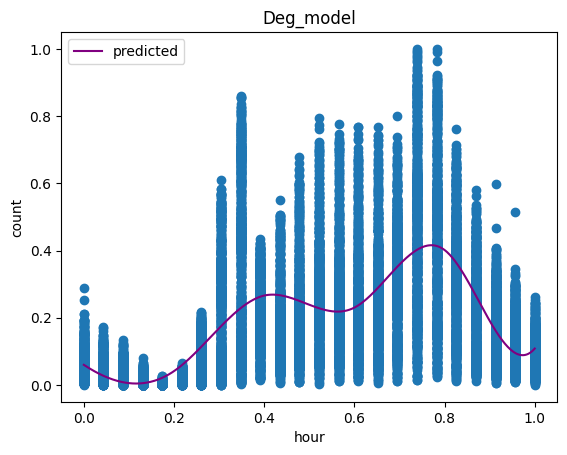

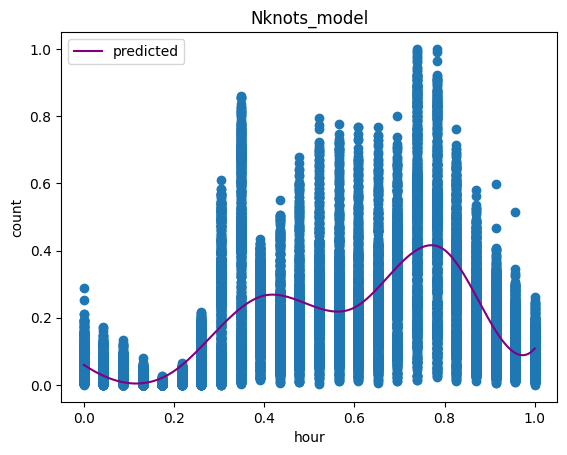

MSE spline:
BaseLine  :  0.0193421063475913
Ext_model  :  0.0193421063475913
Knots_model  :  0.0193421063475913
Deg_model  :  0.0193421063475913
Nknots_model  :  0.0193421063475913


In [9]:
import pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.linear_model import Ridge
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

path = "/content/hour.csv"
df = pandas.read_csv(path)[["hr", "cnt"]]

scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)
x = df[:, 0]
y = df[:, 1]
plt.scatter(x, y)
plt.title("count normalized")
plt.ylabel("count")
plt.xlabel("hour")
plt.legend()
plt.show()
plt.close

print("Spline regression may have better performance than polynomial regression"
+ " because the curve has trend reverals")

alpha = 0.0001
best_score = 0
best_alpha = 0
best_model = None


for i in range(20):
    alpha *= 10
    poly = PolynomialFeatures(12)
    X = poly.fit_transform(x.reshape(-1, 1))
    model = Ridge(alpha=0.001)
    model.fit(X, y)
    score = mse(y, model.predict(X))
    if score > best_score:
        best_score = score
        best_alpha = alpha
        best_model = model

print("MSE : ", best_score)


t = np.linspace(0, 1, 500)
T = poly.fit_transform(t.reshape(-1, 1))
plt.scatter(x, y)
plt.plot(t, best_model.intercept_ + T @ best_model.coef_, color='red')
plt.title("Polynomial")
plt.ylabel("count")
plt.xlabel("hour")
plt.legend()
plt.show()
plt.close

for d in range(1, 4):
    spline = SplineTransformer(n_knots=6, degree=d)

    plt.plot(t, spline.fit_transform(t.reshape(-1, 1)), label="B-spline")
    plt.title("degree = " + str(d))
    plt.ylabel("count")
    plt.xlabel("hour")
    plt.legend()
    plt.show()
    plt.close

print("By increasing the degree of splines, smoothness of the curves increases")


config = [["BaseLine", 6, 3, "Uniform", "Constant"],
  ["Ext_model", 6, 3, "Uniform", "Periodic"],
  ["Knots_model", 6, 1, 4, "Uniform", "Constant"],
  ["Deg_model", 6, 3, "Quantile", "Constant"],
  ["Nknots_model", [3,9,12,18], 3, "Uniform", "Constant"]]

#x = df[:500, 0]
#y = df[:500, 1]
MSE = {}
for params in config:
    spline = SplineTransformer(n_knots=params[1], degree=params[2], knots=params[3], extrapolation=params[4])
    model = make_pipeline(SplineTransformer(n_knots=6, degree=3), Ridge(alpha=1e-5))
    model.fit(x.reshape(-1, 1), y)

    y_plot = model.predict(t.reshape(-1, 1))
    plt.scatter(x, y)
    plt.plot(t, y_plot, label="predicted", color="purple")
    plt.title(params[0])
    plt.ylabel("count")
    plt.xlabel("hour")
    plt.legend()
    plt.show()
    plt.close
    
    MSE[params[0]] = mse(y, model.predict(x.reshape(-1, 1)))

print("MSE spline:")
for m in MSE:
    print(m, " : ", MSE[m])




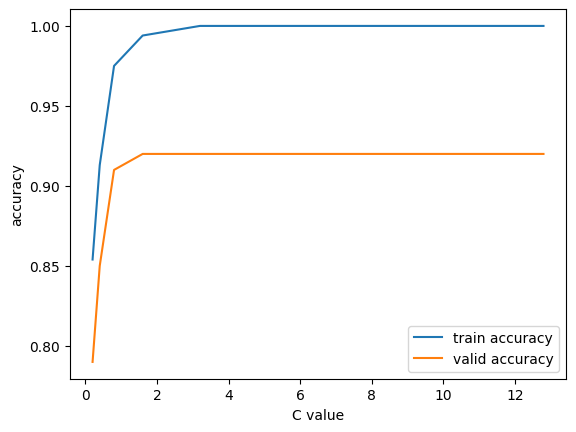

accuracy (part a) :  0.8619
C best :  [1.1390625, 1.7085937500000001, 1.1390625]
test accuracy :  [0.45, 0.7, 0.89]
k-fold best C [1.7085937500000001, 1.7085937500000001, 1.7085937500000001]
k-fold test accuracy :  [0.45, 0.7, 0.89]
k-fold has slightly higher accuracy


In [3]:
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import tensorflow as tf
from numpy import random
import numpy as np
import matplotlib.pyplot as plt


(train_images, train_labels),(test_images,test_labels)=tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000,-1))
test_images = test_images.reshape((10000,-1))


valid_images = train_images[-10000:]
valid_labels = train_labels[-10000:]

train_images = train_images[:10000]
train_labels = train_labels[:10000]

best_score = 0
best_C = 0
c_values = []
train_ac = []
valid_ac = []

C = 0.1
for a in range(7):
    C *= 2

    clf = make_pipeline(StandardScaler(), SVC(C=C))
    clf.fit(train_images, train_labels)
    label_pred_train = clf.predict(train_images)


    label_pred_valid = clf.predict(valid_images)
    score = accuracy_score(valid_labels, label_pred_valid)
    if score > best_score:
        best_C = C
        best_score = score

    c_values.append(C)
    train_ac.append(accuracy_score(train_labels, label_pred_train))
    valid_ac.append(score)


clf = make_pipeline(StandardScaler(), SVC(C=best_C))
clf.fit(train_images, train_labels)
y_pred = clf.predict(test_images)
test_score = accuracy_score(test_labels, y_pred)

plt.plot(c_values, train_ac, label='train accuracy')
plt.plot(c_values, valid_ac, label='valid accuracy')
plt.ylabel("accuracy")
plt.xlabel("C value")
plt.legend()
plt.show()
plt.close

print("accuracy (part a) : ", test_score)


Ns = [20, 40, 100]
train = [[], []]
valid = [[], []]
test = [[], []]

for N in Ns:
    index = np.random.choice(train_images.shape[0], N*7, replace=False)
    train[0].append(train_images[index[:N*6]])
    valid[0].append(train_images[index[-2*N:-N]])
    test[0].append(train_images[index[-N:]])

    train[1].append(train_labels[index[:N*6]])
    valid[1].append(train_labels[index[-2*N:-N]])
    test[1].append(train_labels[index[-N:]])



best_score = [0]*3
C_best = [0]*3
test_scores = [0]*3
for m in range(3):
    C = 0.1
    for a in range(7):
        C *= 1.5
        x_valid = train[0][m][-Ns[m]:]
        x_train = train[0][m][: -Ns[m]]
        y_valid = train[1][m][-Ns[m]:]
        y_train = train[1][m][: -Ns[m]]

        clf = make_pipeline(StandardScaler(), SVC(C=C))
        clf.fit(x_train, y_train)

        y_pred = clf.predict(x_valid)
        score = accuracy_score(y_valid, y_pred)
        if score > best_score[m]:
            C_best[m] = C
            best_score[m] = score
            best_model = clf

    clf = make_pipeline(StandardScaler(), SVC(C=C_best[m]))
    clf.fit(train[0][m], train[1][m])
    y_pred = clf.predict(test[0][m])
    test_scores[m] = accuracy_score(test[1][m], y_pred)


print("C best : ", C_best)
print("test accuracy : ", test_scores)


kf_best_score = [0]*3
kf_C_best = [0]*3
kf_best_model = None
kf_test_scores = [0]*3
for m in range(3):
    C = 0.1
    for a in range(7):
        C *= 1.5
        score = 0
        for k in range(6):

            x_valid = train[0][m][k*Ns[m]: (k+1)*Ns[m]]
            x_train = np.append(train[0][m][: (k)*Ns[m]], train[0][m][(k+1)*Ns[m]:], axis=0)
            y_valid = train[1][m][k*Ns[m]: (k+1)*Ns[m]]
            y_train = np.append(train[1][m][: (k)*Ns[m]], train[1][m][(k+1)*Ns[m]:], axis=0)

            clf = make_pipeline(StandardScaler(), SVC(C=C))
            clf.fit(x_train, y_train)

            y_pred = clf.predict(x_valid)
            score += accuracy_score(y_valid, y_pred)
        score /= 5
        if score > kf_best_score[m]:
            kf_C_best[m] = C
            kf_best_score[m] = score
            kf_best_model = clf

    clf = make_pipeline(StandardScaler(), SVC(C=kf_C_best[m]))
    clf.fit(train[0][m], train[1][m])
    y_pred = clf.predict(test[0][m])
    kf_test_scores[m] = accuracy_score(test[1][m], y_pred)
  

print("k-fold best C", kf_C_best)
print("k-fold test accuracy : ", test_scores)
print("k-fold has slightly higher accuracy")


